In [64]:
import json
import tweepy
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

In [65]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [66]:
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = "C:/Users/Jana/Desktop/json_keys/api_keys.json"
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [67]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [68]:
target_users = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

In [69]:
sentiments = []
for user in target_users:
    
    #Counter 

    counter = 0
    
    #Loop through 5 pages of tweets for each news organization.


    #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1

In [70]:
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments.to_csv("news_mood.csv", index=False)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Tue Feb 06 05:15:13 +0000 2018,0.000,1.000,0.000,Sex toys mysteriously delivered to Canadian un...,0,@BBCWorld
1,-0.4767,Tue Feb 06 04:55:39 +0000 2018,0.430,0.370,0.200,Fundraisers help girl hurt by drunk man https:...,1,@BBCWorld
2,0.2960,Tue Feb 06 04:51:43 +0000 2018,0.000,0.732,0.268,Asia markets join global stock plunge https://...,2,@BBCWorld
3,0.5859,Tue Feb 06 04:48:07 +0000 2018,0.000,0.648,0.352,Dinosaurs ‘too successful for their own good’ ...,3,@BBCWorld
4,0.0000,Tue Feb 06 03:54:43 +0000 2018,0.000,1.000,0.000,"RT @SallyBundockBBC: A ""white knuckle ride"" fo...",4,@BBCWorld
5,-0.7184,Tue Feb 06 02:52:14 +0000 2018,0.545,0.455,0.000,Seven charged over 'circus school' abuse https...,5,@BBCWorld
6,-0.5574,Tue Feb 06 02:34:36 +0000 2018,0.153,0.847,0.000,"The father of Otto Warmbier, the student who d...",6,@BBCWorld
7,0.4939,Tue Feb 06 02:30:56 +0000 2018,0.000,0.758,0.242,Winter Olympics: Friendly North Korea 'is fake...,7,@BBCWorld
8,-0.5106,Tue Feb 06 01:56:22 +0000 2018,0.309,0.480,0.210,RT @BBCNewsAsia: Maldives police have arrested...,8,@BBCWorld
9,0.0000,Tue Feb 06 01:30:35 +0000 2018,0.000,1.000,0.000,Singapore Airshow: Asia aviation in five chart...,9,@BBCWorld


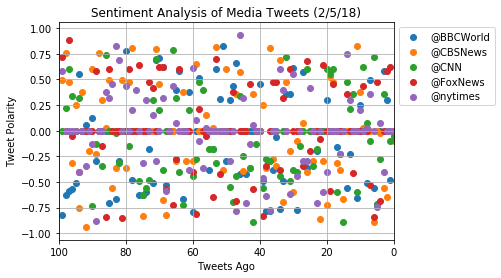

In [71]:
for user in target_users:
    df = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(df["Tweets Ago"], df["Compound"], label=user)

plt.xlim(100, 0)
plt.legend(bbox_to_anchor = (1,1))
plt.title("Sentiment Analysis of Media Tweets (2/5/18)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.grid()
plt.savefig("news_sentiment_analysis.png")
plt.show()

In [72]:
compound_sentiments = news_sentiments.groupby("User")["Compound"].mean()
compound_sentiments

User
@BBCWorld   -0.081203
@CBSNews    -0.007894
@CNN        -0.050709
@FoxNews     0.019588
@nytimes    -0.009830
Name: Compound, dtype: float64

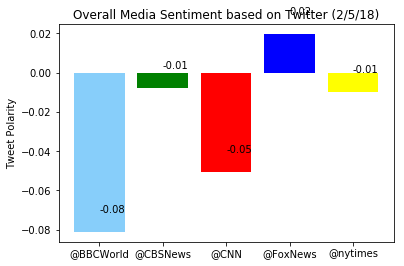

In [73]:
xlabels = compound_sentiments.index
count = 0
for sentiment in compound_sentiments:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
    
x_axis = np.arange(len(compound_sentiments))
plt.bar(x_axis, compound_sentiments, tick_label = xlabels, color = ['lightskyblue', "green", 'red', 'blue', 'yellow'])
plt.title("Overall Media Sentiment based on Twitter (2/5/18)")
plt.ylabel("Tweet Polarity")
plt.savefig("compound_news_sentiments.png")
plt.show()

# Observable Trends

1. Fox News is the only news outlet that had a positive sentiment today.

2. The sentiment of individual tweets is pretty evenly spread across the polarity grid, but most tweets seem to fall on the neutral line.

3. BBC World News and CNN News had relatively steeper drops in overall sentiment today compared to the other news outlets.
